In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Define dimensionality

In [128]:
m, n = 10000, 10

### Build random dataset with some extra rewards

In [181]:
columns = ['1','2','3','4','5','6','7','8','9','10']
dataset = pd.DataFrame(np.random.normal(-1000, 1000, size=(m, n)), columns=columns)
dataset['5'] += 200
dataset.head()

,1,2,3,4,5,6,7,8,9,10
0,-1497.661463,-7.646652,-301.043636,-65.616668,-2427.338262,-2294.549856,-2503.505222,-69.333835,-2061.281659,-1027.221566
1,-1597.002371,-2238.102369,-883.259324,-1108.802704,375.464455,-1452.043626,-3180.406410,-396.247000,-1347.905663,-882.903268
2,-1151.488078,-1516.384771,-477.617885,-2599.137141,-582.736247,-1229.444189,-881.671232,-1436.207888,-1058.119385,217.893290
3,-920.694701,-1905.527791,-438.862274,-3053.271089,1447.913116,-320.793648,-1018.190873,-1270.268598,-2282.065761,-395.508474
4,-838.517465,-1315.226895,-1099.124398,-1355.663314,-245.033955,-411.164776,380.202812,13.940032,-2309.723994,-3300.203349


### Thompson Sampling

In [184]:
selected = np.zeros(m)

positive = np.zeros(n, dtype=np.float16)
negative = np.zeros(n, dtype=np.float16)

total_reward = 0

for i in range(m):

    theta = np.random.beta(1+positive,1+negative)
    max_index = np.argmax(theta)
    selected[i] = max_index
    reward = dataset.values[i,max_index]
    if reward > 0: 
        positive[max_index] += 1
    else:
        negative[max_index] += 1
    total_reward += reward


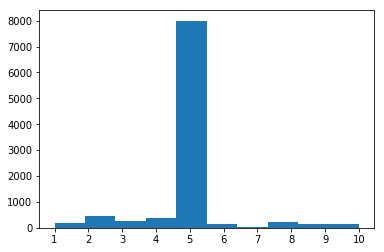

In [185]:
plt.figure()
plt.hist(selected)
plt.xticks(range(n), columns)
plt.show()